# **Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Import**

In [3]:
df = pd.read_csv('price_data.csv')

print(df.shape)
print(df.columns)
df.head()

(1000, 2)
Index(['Price', 'Quantity'], dtype='object')


,Price,Quantity
0,192,80
1,145,960
2,240,200
3,240,150
4,375,740


# **Data Validation**

In [4]:
df.describe()

,Price,Quantity
count,1000.000000,1000.000000
mean,192.404000,1611.900000
std,84.275947,2534.252992
min,15.000000,60.000000
25%,145.000000,300.000000
50%,187.000000,700.000000
75%,216.000000,1907.500000
max,1008.000000,23150.000000


# **Data Exploration**

<Axes: xlabel='Quantity', ylabel='Price'>

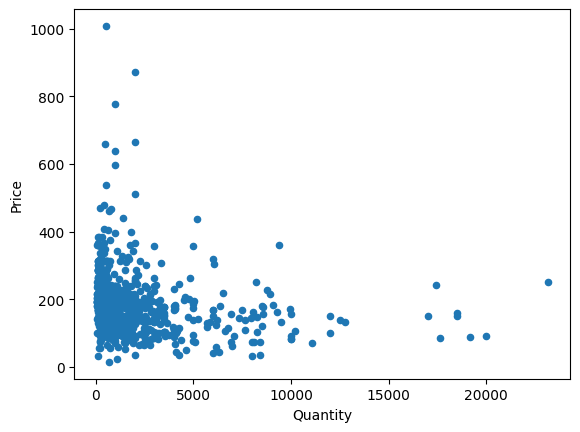

In [6]:
df.plot(x="Quantity", y="Price",kind="scatter")

# **Linear Price Elasticity Model**

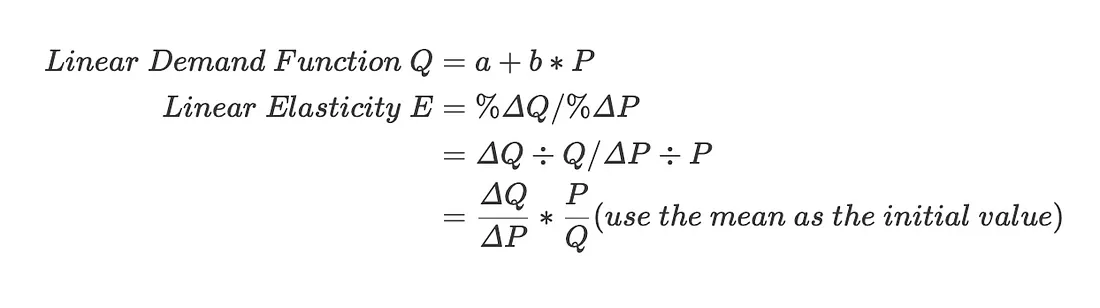

In [7]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

x_value = df['Price']
y_value = df['Quantity']
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()
    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     51.14
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.66e-12
Time:                        11:33:41   Log-Likelihood:                -9231.1
No. Observations:                1000   AIC:                         1.847e+04
Df Residuals:                     998   BIC:                         1.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2889.2504    194.994     14.817      0.0

In [9]:
'''
Observations

- The small P values (0.000) indicate that we can reject the null hypothesis that Price does not affect Quantity. 
- A low R-squared (0.049) indicates that our model cannot explain a lot of the response variability.
- Despite the linear model’s limitations in capturing the complexity of pricing data, we still employ the linear price elasticity formula for calculation purposes. In this case, linear price elasticity is -1.77.
- Now the linear demand function of this product can be written as Quantity = 2889.2504 + (-6.6389)*Price.

'''

'\nObservations\n\n- The small P values (0.000) indicate that we can reject the null hypothesis that Price does not affect Quantity. \n- A low R-squared (0.049) indicates that our model cannot explain a lot of the response variability.\n- Despite the linear model’s limitations in capturing the complexity of pricing data, we still employ the linear price elasticity formula for calculation purposes. In this case, linear price elasticity is -1.77.\n- Now the linear demand function of this product can be written as Quantity = 2889.2504 + (-6.6389)*Price.\n\n'

In [13]:
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params

# Mean Price & Quantity
mean_price = df['Price'].mean()
mean_quantity = df['Quantity'].mean()

#Linear Price elasticity Formula
price_elasticity = round((slope)*(mean_price/mean_quantity),2)

print('Linear Price Elasticity {} with pvalue {}'.format(price_elasticity, coefficient_pvalue))

Linear Price Elasticity -0.79 with pvalue 1.6641207951448687e-12


# **Non-Linear Price Elasticity Model**

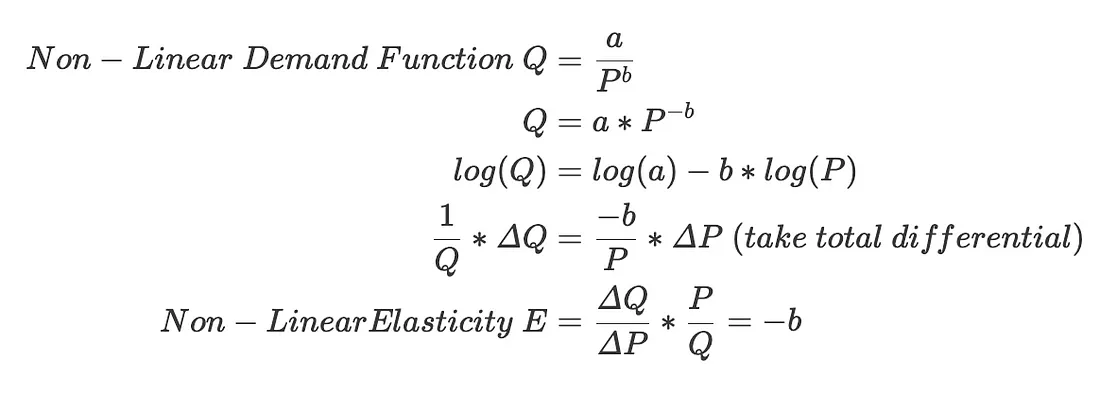

In [14]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np

x_value = np.log(df['Price'])
y_value = np.log(df['Quantity'])
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()
    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.01e-32
Time:                        12:16:21   Log-Likelihood:                -1562.7
No. Observations:                1000   AIC:                             3129.
Df Residuals:                     998   BIC:                             3139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1370      0.449     27.027      0.0

In [ ]:
'''  
- The small P values (0.000) indicate that we can reject the null hypothesis that Price does not affect Quantity.
- We have an improved R-squared (0.132), but it still indicates that our model has room for further enhancement. 

'''

In [15]:
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params

#Non_linear Price elasticity Formula
price_elasticity = round((slope),2)
print('Non_linear Price Elasticity  {} with pvalue {}'.format(price_elasticity, coefficient_pvalue))

Non_linear Price Elasticity  -1.07 with pvalue 1.0083563155905758e-32


In [19]:
# Convert The Intercept Value From Log to Linear
import math
round(math.exp(12.1370),0)

186652.0

In [21]:
print('Non-Linear Quantity Function: ','\n' ,f'Quantity = {round(math.exp(12.1370),0)} * Price**-1.07')

Non-Linear Quantity Function:  
 Quantity = 186652.0 * Price**-1.07


# **Price Optimization**

## **Using Raw Computational Force**

In [37]:
import numpy as np

# Set price elasticity range
elasticity = -1.05

# Set price range
price = list(np.linspace(15, 1000, num=100))
demand = 186652 * np.power(price,elasticity)
revenue = price  * demand
max_revenue = np.max(revenue)
max_index = np.argmax(revenue)
optimal_price = price[max_index]

print('Optimal Price: ',optimal_price)

Optimal Price:  15.0


,Price,Est_Demand,Est_Revenue
0,15.000000,10867.679592,163015.193887
1,24.949495,6369.682734,158920.367205
2,34.898990,4477.949050,156275.898650
3,44.848485,3441.101505,154328.188696
4,54.797980,2788.238197,152789.820406
...,...,...,...
95,960.202020,137.896074,132408.088833
96,970.151515,136.411537,132339.859579
97,980.101010,134.957887,132272.361122
98,990.050505,133.534176,132205.578333


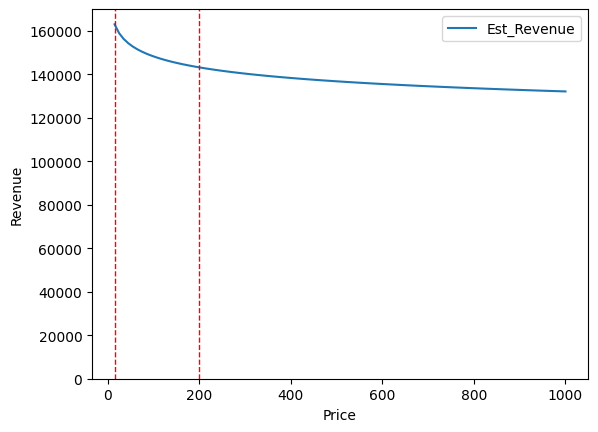

In [41]:
price_df = pd.DataFrame([price,demand, revenue],index=['Price','Est_Demand','Est_Revenue']).T
display(price_df)

# Plot Price Vs Revenue
price_df.plot(kind='line', y='Est_Revenue', x="Price")
plt.axvline(x=optimal_price, color='r', linestyle='dashed', linewidth=1, label='Optimal Price')
plt.axvline(x=200, color='r', linestyle='dashed', linewidth=1, label='Optimal Price')
plt.ylim(0,170000)
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.show()

# **Price Strategy**

1. Perfectly inelastic demand (E = 0): When demand is perfectly inelastic, changes in the price of the good do not affect its quantity demanded, resulting in a vertical straight-line demand curve.

2. Relatively inelastic demand (-1 < E < 0): When demand is relatively inelastic, a change in price results in a smaller percentage change in quantity demanded, leading to a downward-sloping demand curve.

3. Unit elastic demand (E = -1): When demand is unit elastic, the percentage change in quantity demanded equals that in price, resulting in a constant demand curve with a slope of -1.

4. Relatively elastic demand (-∞ < E < -1): When demand is relatively elastic, a change in price leads to a larger percentage change in quantity demanded, resulting in a demand curve that slopes more steeply downward.

5. Perfectly elastic demand (E is -∞): When demand is perfectly elastic, any increase in the price of the good, no matter how small, results in the quantity demanded dropping to zero, resulting in a horizontal straight-line demand curve.

In [ ]:
'''  
Elastic Demand: If a product has a high price elasticity of demand, meaning that consumers are highly sensitive 
                to changes in price, businesses may need to adopt a lower pricing strategy to attract more 
                customers and increase sales. This could involve lowering the price of the product or offering
                discounts, coupons, or other promotional offers.

Inelastic Demand: If a product has a low price elasticity of demand, meaning that consumers are relatively 
                insensitive to changes in price, businesses may be able to adopt a higher pricing strategy 
                without significantly reducing demand. This could involve raising the price of the product or
                offering premium features or services to justify a higher price point.
'''

## **Scenario Analysis**

### **Scenario 01**

- Elasticity = -0.8

In [60]:
#add -0.8 inelastic 
elasticity1 = -0.8
# Set price range
price = list(np.linspace(15, 1000, num=100))
demand1 = 186652 * np.power(price,elasticity1)
revenue1 = price  * demand1
max_revenue1 = np.max(revenue1)
max_index1 = np.argmax(revenue1)
price[max_index1]

data1 = {'Price': price, 'SC01_Demand': demand1, 'SC01_Revenue': revenue1}
price_df1 = pd.DataFrame(data1)

print('price df1')
display(price_df1)

price df1


,Price,SC01_Demand,SC01_Revenue
0,15.000000,21387.481189,320812.217828
1,24.949495,14235.844676,355177.134851
2,34.898990,10883.845348,379835.208857
3,44.848485,8905.010326,399376.220680
4,54.797980,7586.142729,415705.296028
...,...,...,...
95,960.202020,767.613414,737063.951058
96,970.151515,761.309054,738585.132297
97,980.101010,755.120009,740093.883779
98,990.050505,749.043032,741590.431716


### **Scenario 02**

- Elasticity = -2

In [59]:
#add -2 perpectly elastic
elasticity2 = -2

price = list(np.linspace(15, 1000, num=100))
demand2 = 186652 * np.power(price,elasticity2)
revenue2 = price  * demand2
max_revenue2 = np.max(revenue2)
max_index2 = np.argmax(revenue2)
price[max_index2]

data2 = {'Price': price, 'SC02_Demand': demand2,'SC02_Revenue': revenue2,}
price_df2 = pd.DataFrame(data2)

print('price df2')
display(price_df2)

price df2


,Price,SC02_Demand,SC02_Revenue
0,15.000000,829.564444,12443.466667
1,24.949495,299.853506,7481.193522
2,34.898990,153.252276,5348.349638
3,44.848485,92.797675,4161.835135
4,54.797980,62.158933,3406.183963
...,...,...,...
95,960.202020,0.202445,194.388260
96,970.151515,0.198314,192.394690
97,980.101010,0.194308,190.441595
98,990.050505,0.190422,188.527756


In [54]:
price_df.head()

,Price,Est_Demand,Est_Revenue
0,15.000000,10867.679592,163015.193887
1,24.949495,6369.682734,158920.367205
2,34.898990,4477.949050,156275.898650
3,44.848485,3441.101505,154328.188696
4,54.797980,2788.238197,152789.820406


In [64]:
# Merge Dataframes
final_price_df = price_df.merge(price_df1, left_on='Price', right_on='Price')\
                          .merge(price_df2, left_on='Price', right_on='Price')

final_price_df = final_price_df.set_index('Price')
display(final_price_df)

,Est_Demand,Est_Revenue,SC01_Demand,SC01_Revenue,SC02_Demand,SC02_Revenue
Price,,,,,,
15.000000,10867.679592,163015.193887,21387.481189,320812.217828,829.564444,12443.466667
24.949495,6369.682734,158920.367205,14235.844676,355177.134851,299.853506,7481.193522
34.898990,4477.949050,156275.898650,10883.845348,379835.208857,153.252276,5348.349638
44.848485,3441.101505,154328.188696,8905.010326,399376.220680,92.797675,4161.835135
54.797980,2788.238197,152789.820406,7586.142729,415705.296028,62.158933,3406.183963
...,...,...,...,...,...,...
960.202020,137.896074,132408.088833,767.613414,737063.951058,0.202445,194.388260
970.151515,136.411537,132339.859579,761.309054,738585.132297,0.198314,192.394690
980.101010,134.957887,132272.361122,755.120009,740093.883779,0.194308,190.441595


<Axes: xlabel='Price'>

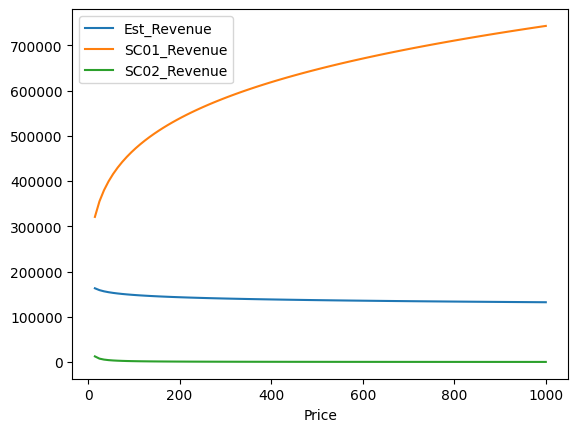

In [72]:
final_price_df.loc[:,['Est_Revenue','SC01_Revenue','SC02_Revenue']].plot()

# **Reference**

* https://medium.com/@chenycy/unlock-price-optimization-potential-with-python-modelling-linear-and-non-linear-price-elasticity-563773e5ba53

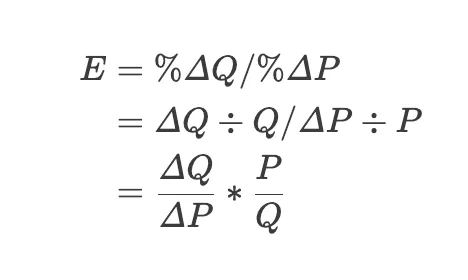